# Data analysis of global terrorism

## Introduction

The Global Terrorism Database (GTD) documents more than 200,000 international and domestic terrorist attacks that occurred worldwide since 1970. With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.Terrorism implies the use of violence to terrorise a population or government for certain political, religious or ideological purpose. The threat of terrorism has become a worldwide concern with several parts of the world reeling under frequent terrorist strikes. With little concern for human lives, terrorists continue to strike with impunity, leaving a trail of death and destruction, wherever they choose to inflict their blows.

In this dataset, we will be exploring the terror attacks over the world from 1970-2016, finding the most affected countries, the most notorious groups, their motives,etc.

GLOBAL TERRORISM
- Story board
-  [Reading Data](#1.1)
-  [Data Cleaning](#1.2)
-  [Exploratory data analysis](#2)
-  [Terrorism in India](#3)
-  [Conclusion](#4)

Tablue Dashboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime
import os
import re
import calendar as cl
from mpl_toolkits.basemap import Basemap
import base64
sns.set_style("darkgrid")
import math
import geopandas as gpd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gtd/globalterrorismdb_0718dist.csv
/kaggle/input/shap-file/TM_WORLD_BORDERS-0.3.prj
/kaggle/input/shap-file/TM_WORLD_BORDERS-0.3.shx
/kaggle/input/shap-file/TM_WORLD_BORDERS-0.3.shp
/kaggle/input/shap-file/TM_WORLD_BORDERS-0.3.dbf


<a id="1.1"></a>
1.1 READING DATA

In [2]:
df_path= '/kaggle/input/gtd/globalterrorismdb_0718dist.csv'
df = pd.read_csv(df_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

- Columns names are Improper we'll be changing the columns name and drop data unecessary data

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
data = df[['Year','Month','Day','Country','Region','city','latitude','longitude',
           'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
Data = data.copy()

<a id="1.2"></a>
## Data Cleaning
Data scrubbing removing unwanted data and imputing/dropping unwanted values.Improve quality of data.
    
    Preliminary analysis
    
    - 56% of data is missing/not useable.
    - Total original 24528285(df).
    - Total Missing Values 13853997(df) from orignal data set.
    - Data has 7.67 % null values(using this) from the required data.
    
    Solution 
    
    - Remove data that are not important.
    - Determine required data and use it for analysis.

In [8]:
data.isnull().sum().sort_values(ascending=False)

Motive         131130
Summary         66129
Wounded         16311
Killed          10313
longitude        4557
latitude         4556
Target            636
city              434
Weapon_type         0
Target_type         0
Group               0
Year                0
Month               0
Region              0
Country             0
Day                 0
AttackType          0
dtype: int64

In [9]:
# NUMERICAL DATA
list(data.select_dtypes(include = np.number))

['Year', 'Month', 'Day', 'latitude', 'longitude', 'Killed', 'Wounded']

<a id="2"></a>
## Exploratory Data Analysis
Lets draw some distribution charts to get prelimnary insights

### Inference 
- Major attacks taken place during 2010-15 decade where middle east,africa and south asia where most casulties took place.
- Bombing was the major contributor to loss in life and reputation of nation.Where there were some incidents of hijacking   making it least contributer to death of people
- Many instances of terrorism could not be connected to any particular terror group rest,
- Major contributers for Terrorism were all islamic(Taliban,IS) and communist .
- Most deaths are caused by Bombings & Armed assualt

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

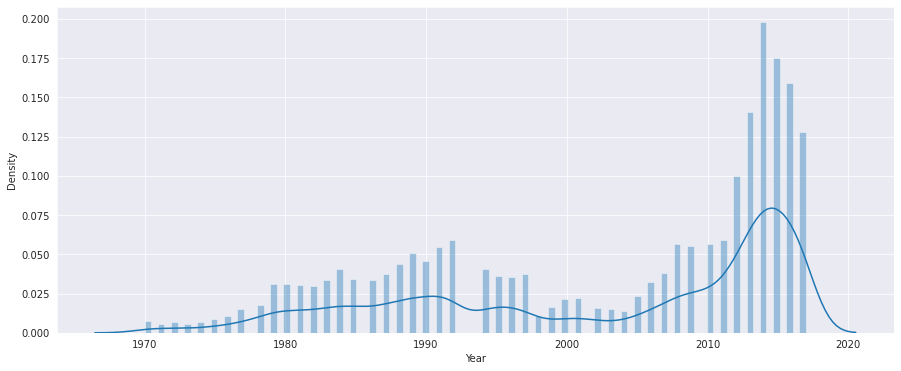

In [37]:
plt.subplots(figsize=(15,6))
sns.distplot(data.Year,bins=100)

In [11]:
data.Month.head(5)

0    7
1    0
2    1
3    1
4    1
Name: Month, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Killed'>

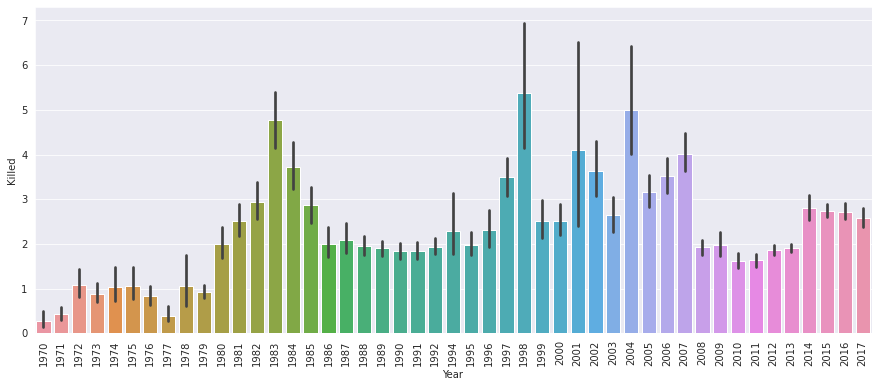

In [36]:
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x= data.Year,y=data.Killed)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


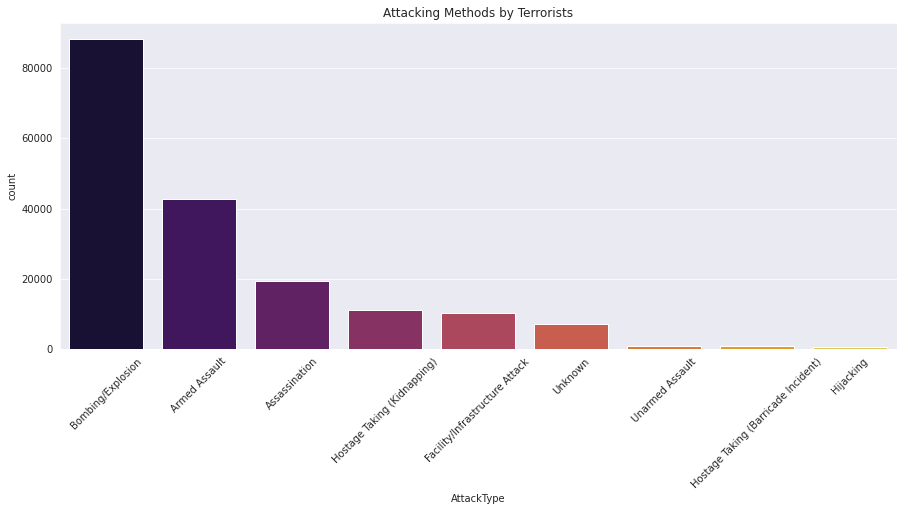

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=data,palette='inferno',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Attacking Methods by Terrorists')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


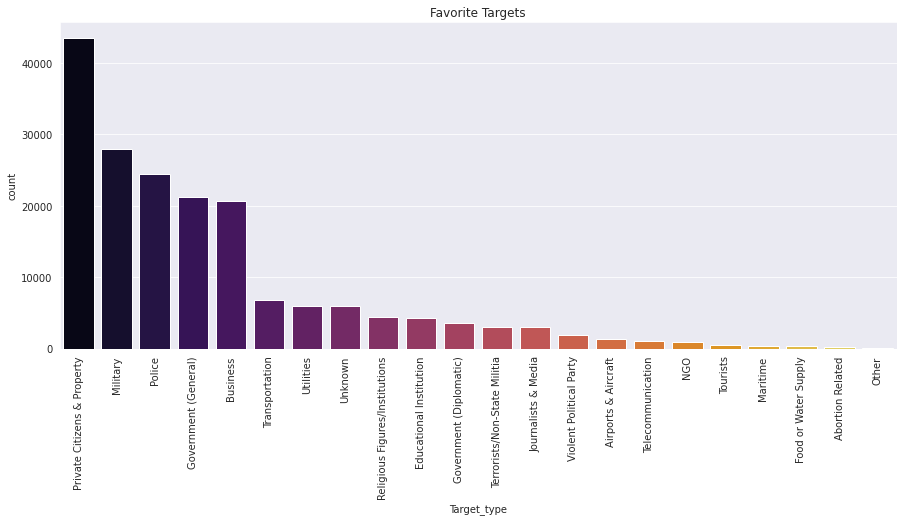

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(data['Target_type'],palette='inferno',order=data['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<AxesSubplot:>

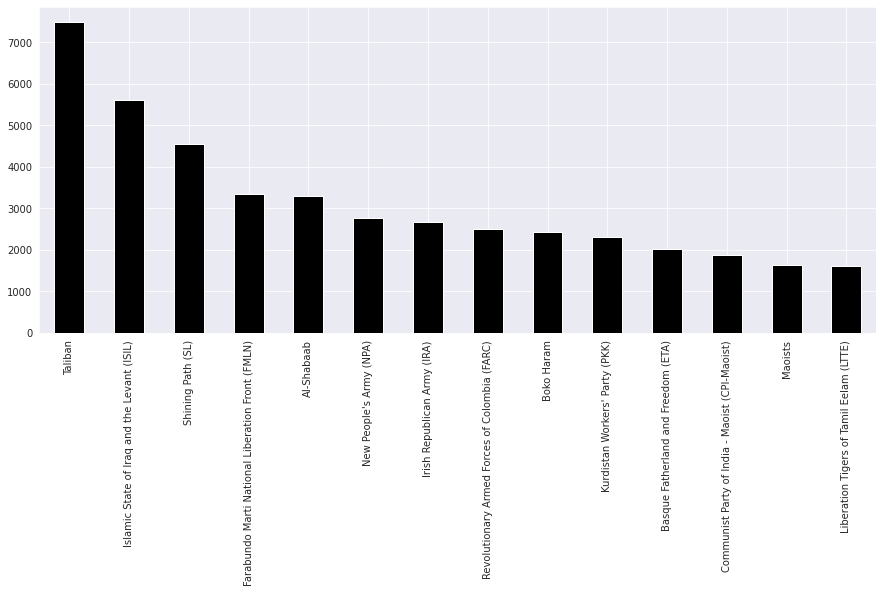

In [15]:
plt.subplots(figsize=(15,6))
data.Group.value_counts()[1:15].head(30).plot(kind ='bar',colormap ="cubehelix")

<AxesSubplot:title={'center':'Most Targeted'}, xlabel='AttackType'>

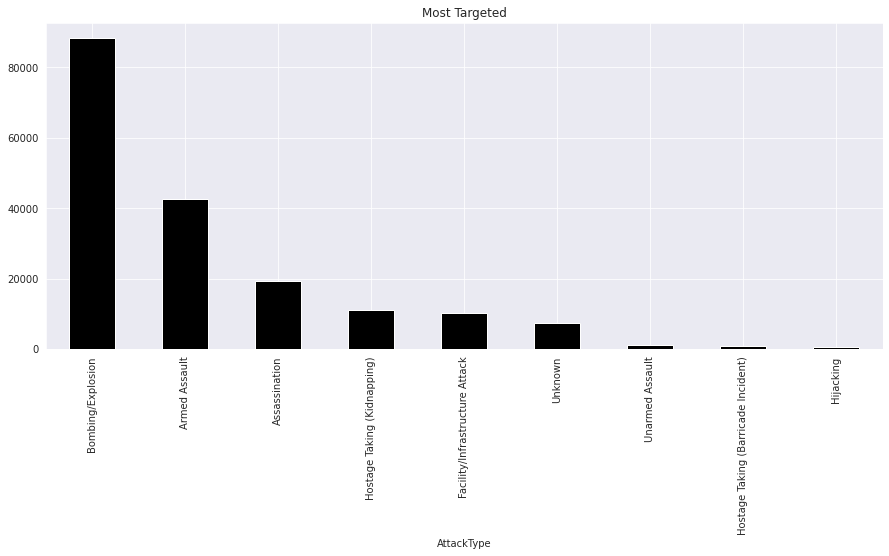

In [16]:
plt.subplots(figsize=(15,6))
data.groupby('AttackType').AttackType.count().sort_values(ascending=False).plot(kind = 'bar',title='Most Targeted',colormap ="cubehelix")

Major terror attacks took place in middle east & north Africa followed by south asia. Australian and central asias had least terror attacks compared to it's counterparts.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


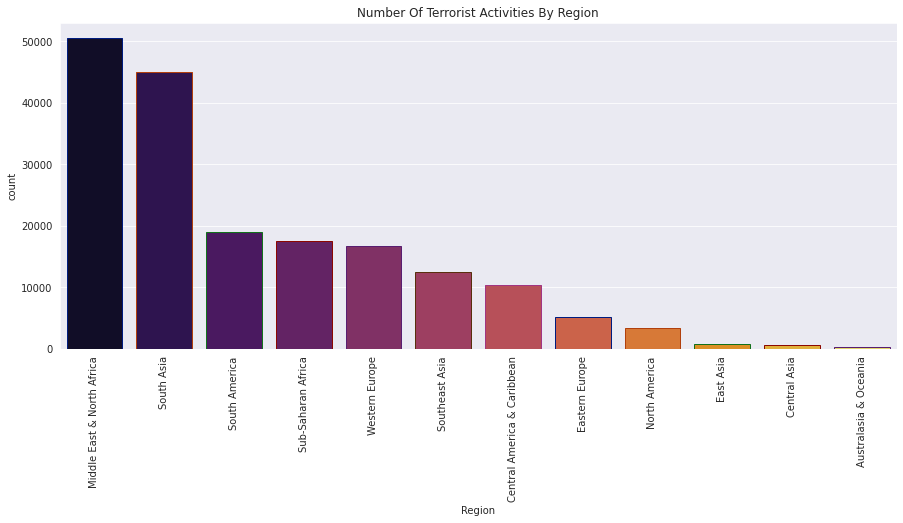

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=data,palette='inferno',edgecolor=sns.color_palette('dark',7),order=data['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

- Iraq and pakistan are one of the top countries which suffer from terror attacks majorly due to strongholds of terroist in these regions.
- Spain is one of the country where ther were least amout of terrorist attacks followe by Yemen.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


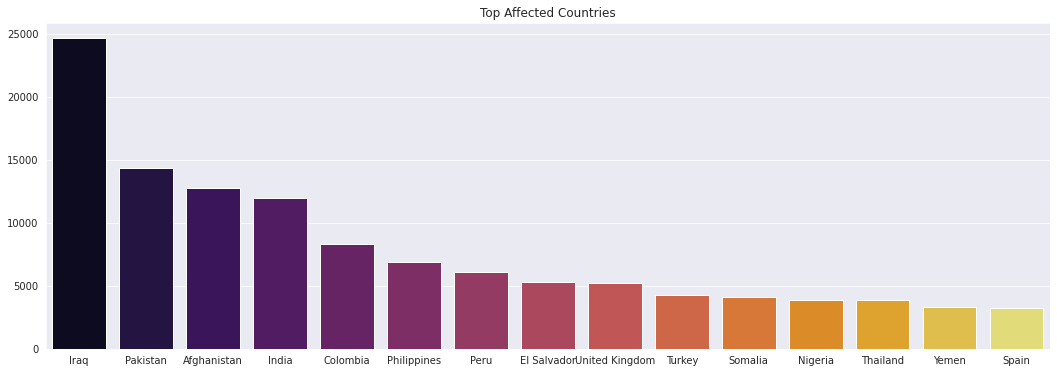

In [35]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()


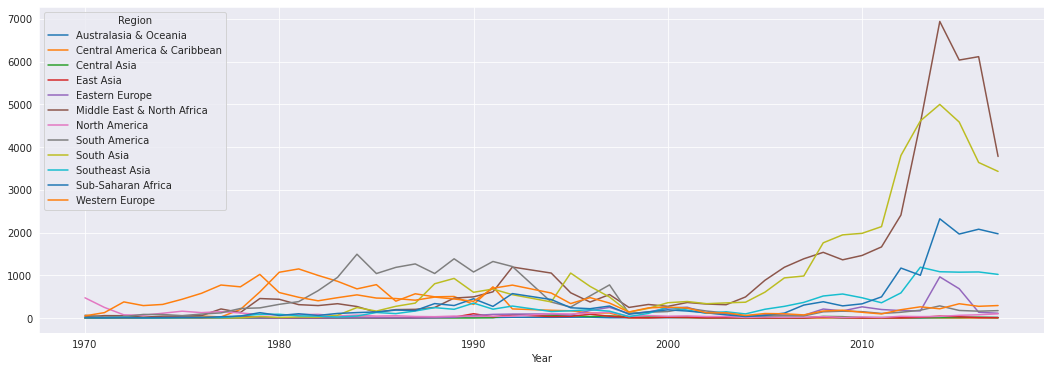

In [19]:
pd.crosstab(data["Year"], data["Region"]).plot()
plt.gcf().set_size_inches(18,6)
plt.show()

- Explosives(IED) and firearms are major tools used for terrorism whereas Chemicals were used was less significantly used compared to other tools.

<AxesSubplot:>

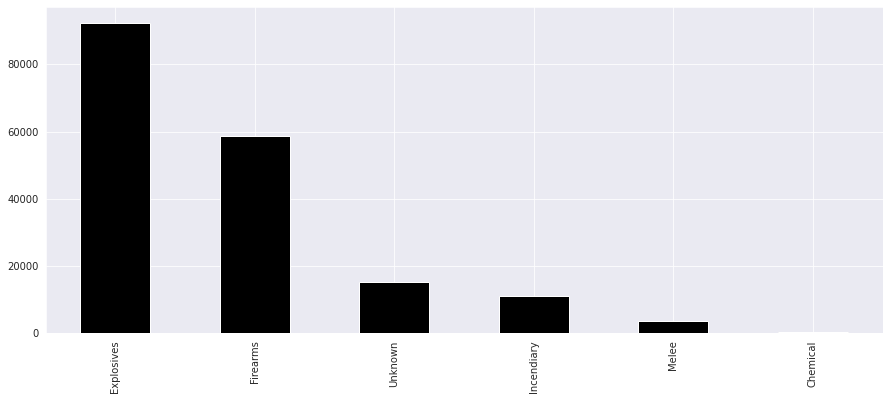

In [38]:
plt.subplots(figsize=(15,6))
data.Weapon_type.value_counts()[:6].plot(kind='bar',colormap ="cubehelix")

Most terrorist attacks took place in Bagdad which is a strong hold of alqueda and ISIS and the gap between suceeding city is too large.Bagdad leads for most no of terrorist attacks makes it one of dangerous city.

In [22]:
data.city.value_counts()[1:30]

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Srinagar           658
Jerusalem          636
Paris              612
Fallujah           582
Tripoli            565
Dhaka              557
Rome               551
Arish              521
Ramadi             509
Name: city, dtype: int64

<AxesSubplot:title={'center':'No of attacks in particular city'}, xlabel='city', ylabel=' no of attacks'>

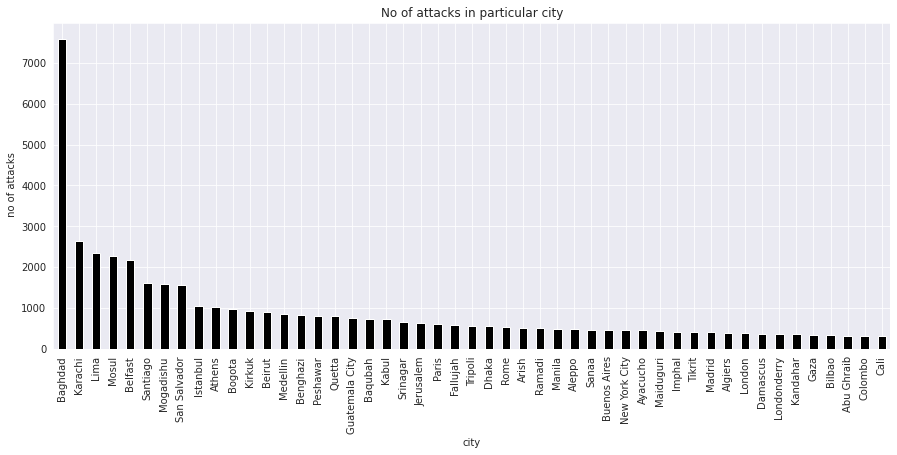

In [23]:
plt.subplots(figsize=(15,6))
data.city.value_counts()[1:50].plot(kind ='bar',xlabel= 'city',ylabel =' no of attacks',colormap ="cubehelix",title = 'No of attacks in particular city')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take p

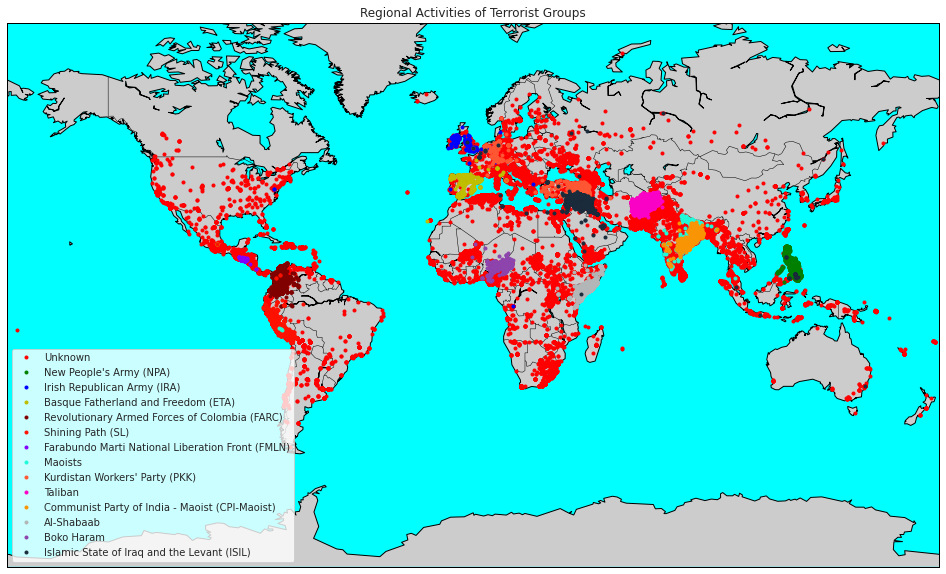

In [24]:
top_groups=data[data['Group'].isin(data['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

<a id="3"></a>
## Terrorism in India

- Srinagar,Impal,New Delhi,Amritsar had most number of terrorist attacks,when compared to other cities.

<AxesSubplot:>

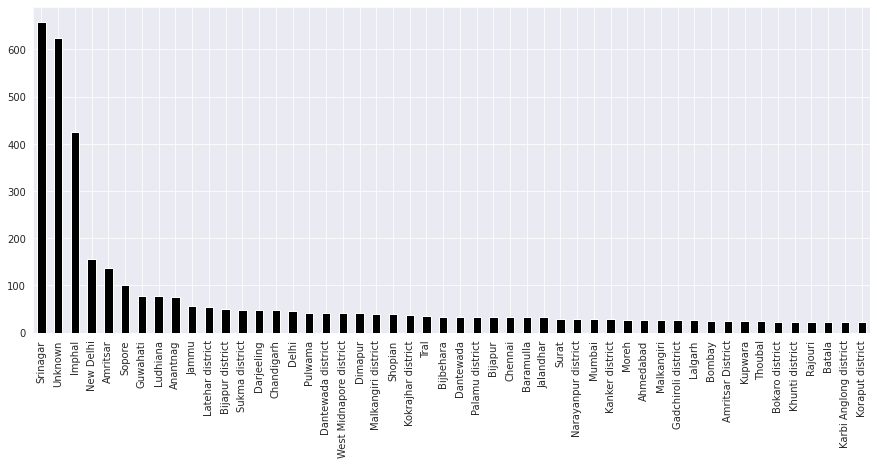

In [25]:
plt.subplots(figsize=(15,6))
data.city[data.Country=='India' ].value_counts()[:50].plot(kind ='bar',colormap ="cubehelix")

- In India Bombing and armed assualts were major methods used in order to cause terrorism 

<AxesSubplot:>

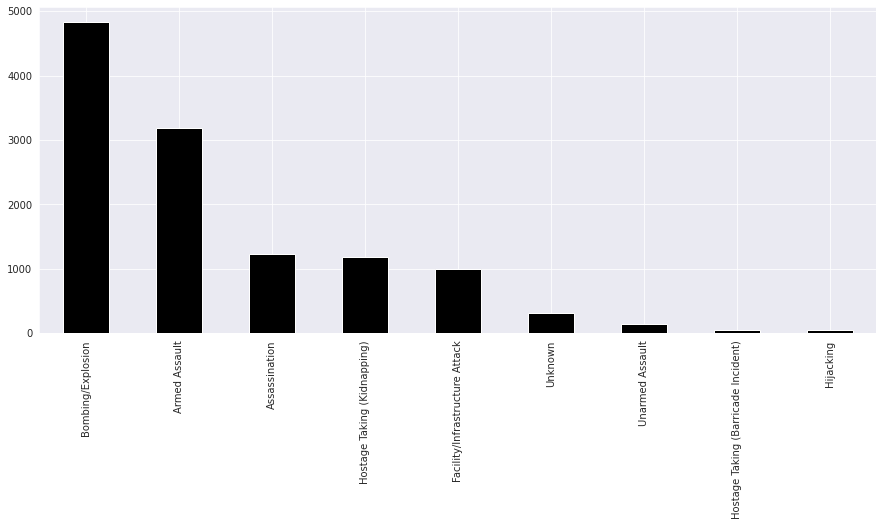

In [26]:
plt.subplots(figsize=(15,6))
data.AttackType[data.Country=='India'].value_counts().plot(kind ='bar',colormap ="cubehelix")

<AxesSubplot:>

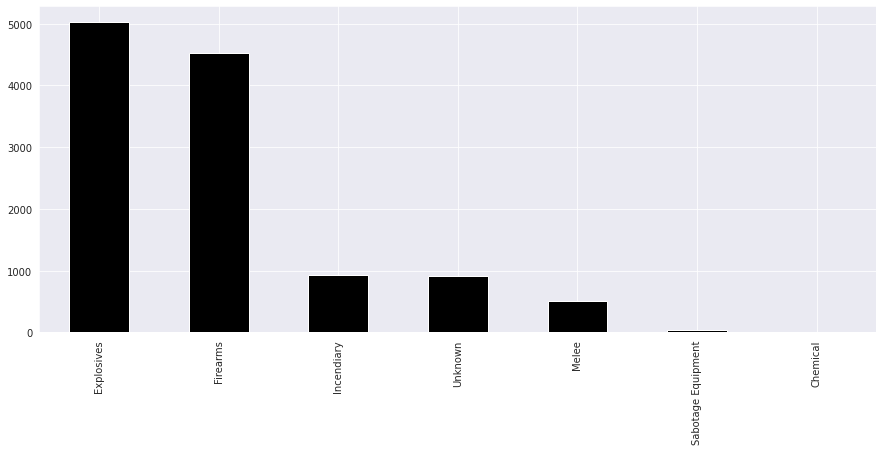

In [27]:
plt.subplots(figsize=(15,6))
data.Weapon_type[data.Country == 'India'].value_counts()[:7].plot(kind='bar',colormap ="cubehelix")

- Top contributers to terrorism are communist,Sikh extremist,HM,Let in india.

<AxesSubplot:>

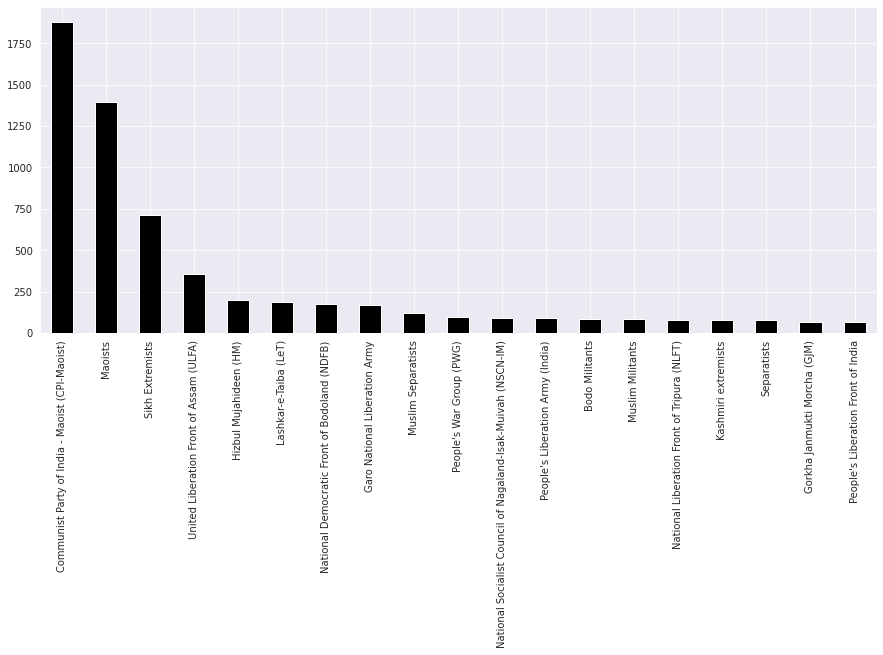

In [28]:

plt.subplots(figsize=(15,6))
data.Group[data.Country =='India'].value_counts()[1:20].plot(kind='bar',colormap ="cubehelix")


 Terrorist attacks were targeted majorly on Civillians and soilders

<AxesSubplot:>

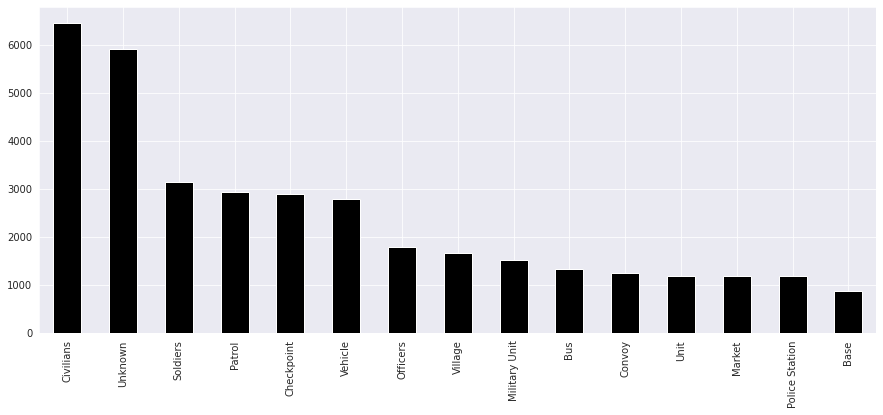

In [39]:
plt.subplots(figsize=(15,6))
data.Target.value_counts()[:15].plot(kind ='bar',colormap ="cubehelix")

<a id="4"></a>
## Conclusion

- Most people killed in terrorist attacks were Civillians.
- Most terrorist attacks took place during 2000-2015.
- Iraq and pakistan experienced most terroe attacks.
- Bombing,Firearms,Armed assualts were major contributers to loss of life during terrorist attacks.
- Taliban and ISIS were one of the most notorious terrorist groups.
- In India HM,LET,communists were top contributers for terrorism.
